Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [309]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import PIL
import PIL.Image
import tensorflow_datasets as tfds


In [310]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [311]:
data_dir = "/content/drive/MyDrive/flowers"



In [312]:
batch_size = 32
img_height = 180
img_width = 180

In [313]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.


In [314]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [315]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [316]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


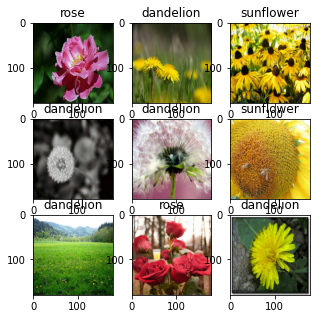

In [317]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for images, labels in train_ds.take(1):        ### 8 is a count
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)     ####(r,c,index no)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [318]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [319]:
x = np.array(image_batch)
y=np.array(labels_batch.shape)

In [320]:
from tensorflow.keras import layers                  ### Standardizing 

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [321]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [322]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [338]:
from keras import regularizers
num_classes = 5
model = tf.keras.Sequential([
  
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
 
  #### Ist layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
 
  ##### 2nd layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
 
  #3rd layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  
  
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [339]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [340]:
epochs =15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose =1
)

Epoch 1/15
109/109 [==============================] - 3s 24ms/step - loss: 1.3460 - accuracy: 0.4237 - val_loss: 1.1348 - val_accuracy: 0.5556
Epoch 2/15
109/109 [==============================] - 2s 22ms/step - loss: 1.0588 - accuracy: 0.5840 - val_loss: 0.9550 - val_accuracy: 0.6227
Epoch 3/15
109/109 [==============================] - 2s 22ms/step - loss: 0.9741 - accuracy: 0.6217 - val_loss: 0.8752 - val_accuracy: 0.6713
Epoch 4/15
109/109 [==============================] - 2s 22ms/step - loss: 0.9087 - accuracy: 0.6470 - val_loss: 0.8328 - val_accuracy: 0.6887
Epoch 5/15
109/109 [==============================] - 2s 22ms/step - loss: 0.8414 - accuracy: 0.6760 - val_loss: 0.8153 - val_accuracy: 0.6863
Epoch 6/15
109/109 [==============================] - 2s 22ms/step - loss: 0.8094 - accuracy: 0.6861 - val_loss: 0.8210 - val_accuracy: 0.6933
Epoch 7/15
109/109 [==============================] - 2s 22ms/step - loss: 0.7728 - accuracy: 0.7074 - val_loss: 0.7628 - val_accuracy: 0.7083

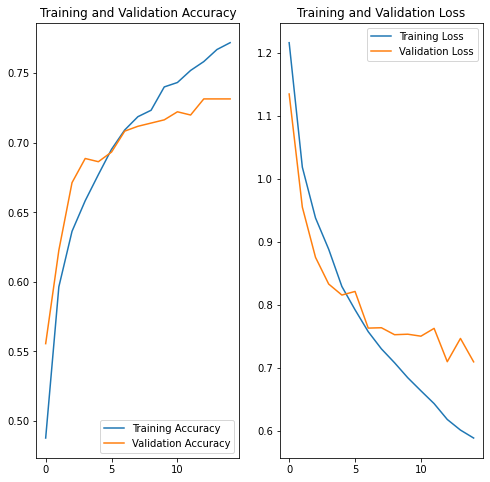

In [341]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***Prediction Accuracy is above 85***

In [343]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is most likely belongs to {} with a {:.2f} accuracy."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image is most likely belongs to sunflower with a 96.21 accuracy.
